In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

imoveis = pd.read_csv('data/Valorizacao_Ambiental.csv', sep = ';')
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


Vendo tamanho da amostra:

In [2]:
imoveis.shape

(172, 10)

Verificando se existe valores nulos:

In [3]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

Verificando estatisticas basicas:

In [4]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Identificando a variavel target:

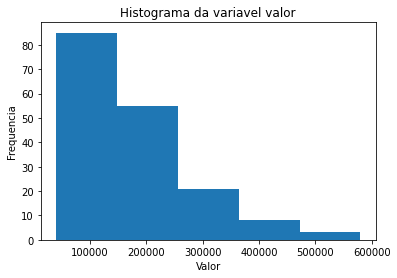

In [5]:
plt.hist(imoveis['Valor'], bins=5)

plt.ylabel('Frequencia')
plt.xlabel('Valor')
plt.title('Histograma da variavel valor')

plt.show()

In [6]:
imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])

In [7]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


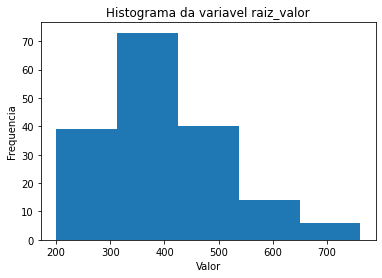

In [8]:
plt.hist(imoveis['raiz_valor'], bins=5)

plt.ylabel('Frequencia')
plt.xlabel('Valor')
plt.title('Histograma da variavel raiz_valor')

plt.show()

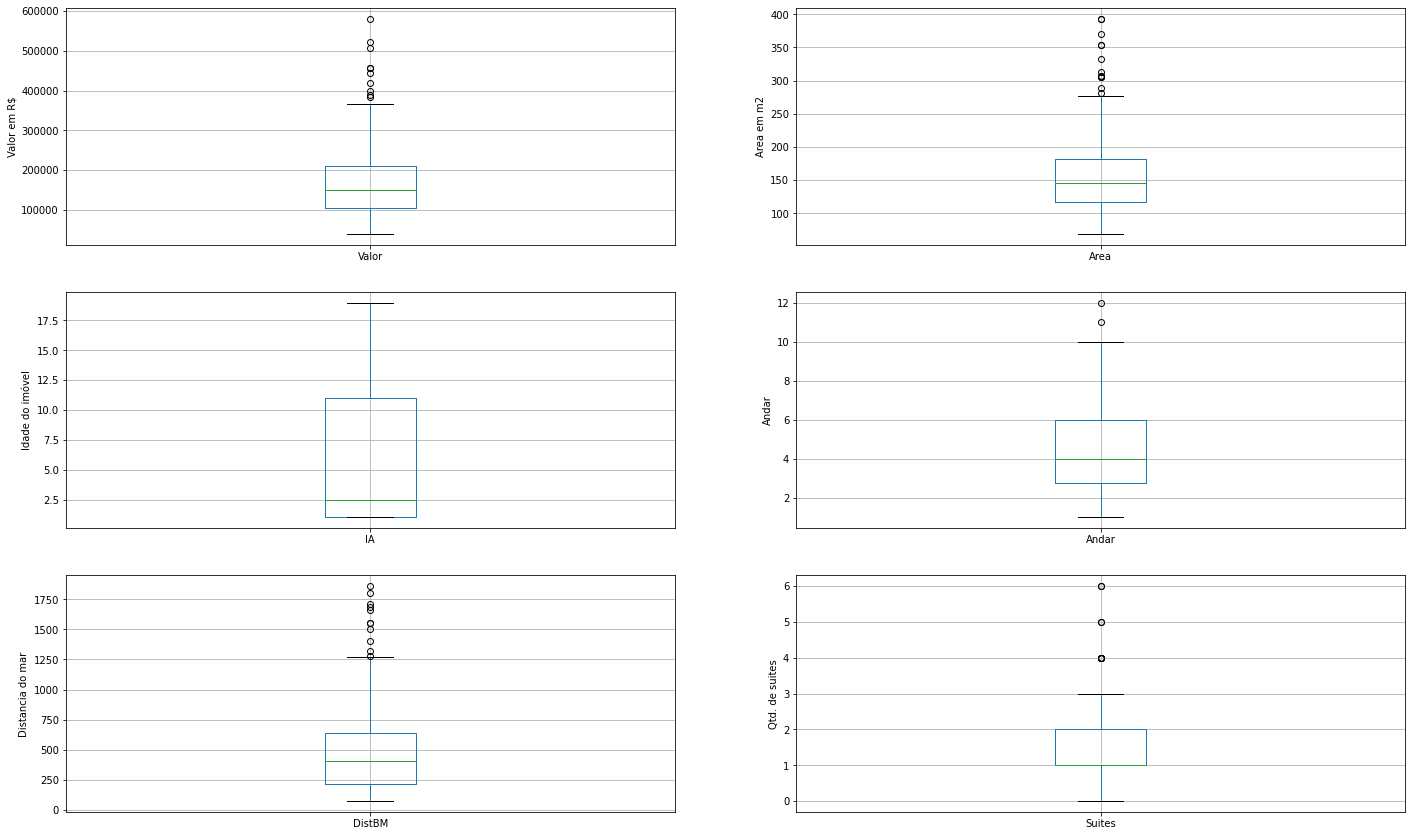

In [9]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em R$')

plt.subplot(4,2,2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em m2')

plt.subplot(4,2,3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('Idade do imóvel')

plt.subplot(4,2,4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4,2,5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('Distancia do mar')

plt.subplot(4,2,6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Qtd. de suites')

plt.show()

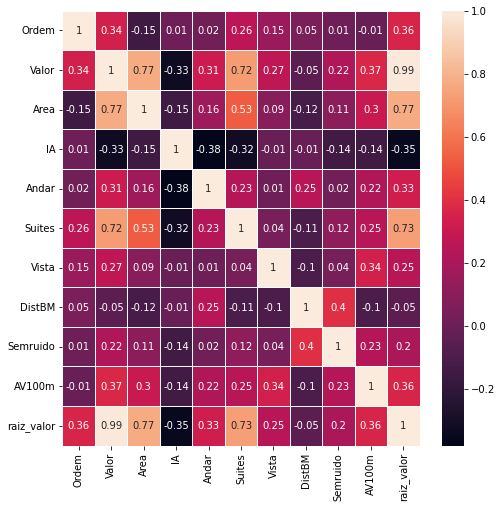

In [10]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot = True, linewidths=0.5, ax=ax)

plt.show()

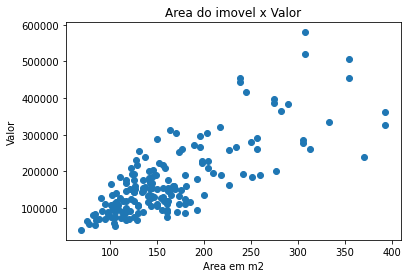

In [11]:
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel('Area em m2')
plt.ylabel('Valor')
plt.title('Area do imovel x Valor')
plt.show()

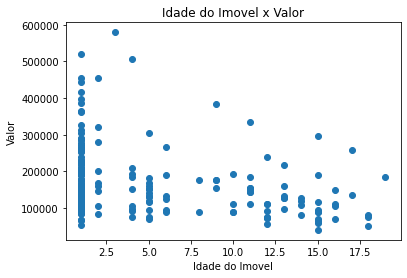

In [12]:
plt.scatter('IA', 'Valor', data=imoveis)
plt.xlabel('Idade do Imovel')
plt.ylabel('Valor')
plt.title('Idade do Imovel x Valor')
plt.show()

In [13]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


<AxesSubplot: xlabel='Vista', ylabel='Valor'>

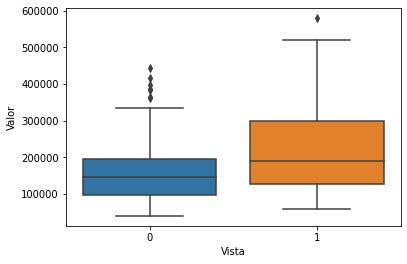

In [14]:
sns.boxplot(x='Vista', y='Valor', data=imoveis)

<AxesSubplot: xlabel='Semruido', ylabel='Valor'>

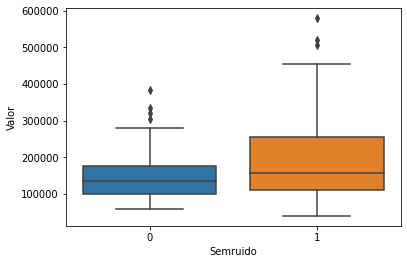

In [15]:
sns.boxplot(x='Semruido', y='Valor', data=imoveis)

<AxesSubplot: xlabel='AV100m', ylabel='Valor'>

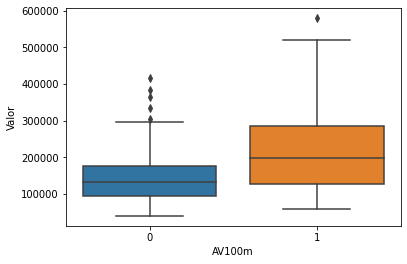

In [16]:
sns.boxplot(x='AV100m', y='Valor', data=imoveis)

Regressão Linear multipla:

In [17]:
from sklearn.linear_model import LinearRegression

Criando um objeto de regressão linear:

In [18]:
lr = LinearRegression()

In [19]:
x = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

In [20]:
y = imoveis[['Valor']]

Separando os dados de treino e de teste:

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=101)

Treinando modelo:

In [22]:
lr.fit(x_train, y_train)

LinearRegression()

Calculando o valor predito da variavel reposta na amostra teste:

In [23]:
y_pred = lr.predict(x_test)

Intercepto do coeficiente de Regressão:

In [24]:
print('Intercepto', lr.intercept_)

Intercepto [-40165.8752773]


In [25]:
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


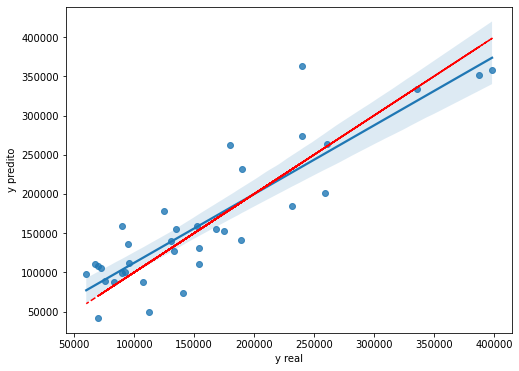

In [26]:
fig = plt.figure(figsize=(8,6))
ax = sns.regplot(x= y_test, y = y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Avaliando modelo:

In [28]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE: ', MAE) # media do valor absoluto dos erros
print('MSE: ', MSE) # media dos erros quadraticos
print('r2: ', r2) # R-quadrado

MAE:  34422.988570945556
MSE:  1844288772.1789758
r2:  0.7584591969125047


Avaliando com DecisionTreeRegressor:

In [29]:
from sklearn.tree import DecisionTreeRegressor

Criando o modelo DecisionTreeRegressor:

In [30]:
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [31]:
y_pred_model_dtr = model_dtr.predict(x_test)

In [32]:
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print('MAE: ', MAE) # media do valor absoluto dos erros
print('MSE: ', MSE) # media dos erros quadraticos
print('r2: ', r2) # R-quadrado

MAE:  44913.75102040816
MSE:  3223969337.3848395
r2:  0.577766695417574


Avaliando com SVR:

In [33]:
from sklearn.svm import SVR

criando o modelo SVM:

In [34]:
svr = SVR(kernel='linear')

In [35]:
svr.fit(x_train,y_train)

C:\Users\mvsam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [36]:
y_pred_svr = svr.predict(x_test)

In [37]:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print('MAE: ', MAE) # media do valor absoluto dos erros
print('MSE: ', MSE) # media dos erros quadraticos
print('r2: ', r2) # R-quadrado

MAE:  43153.53918496288
MSE:  3123421996.7782364
r2:  0.5909350700044546
